##Used Python package MDAnalysis tool to analyze protein dynamical features

<img src="villin2.png">
###From the MD simulation trajectory, the protein start unfolding at 180ns.
###We are interested in H-bond (r1 and r2) change as the function of the time 

In [1]:
import MDAnalysis as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
u = md.Universe("input.pdb", "trajout.xtc")

In [3]:
def HBond_dis(u):
    ARG14= []
    for i in [215,218]:
        H=u.selectAtoms("bynum %d" %(i))
        ARG14.append(H.coordinates())


    Oxyegen = []
    for i in [21,42]:
        O=u.selectAtoms("bynum %d" %(i))
        Oxyegen.append(O.coordinates())
        
    
    
    box = u.trajectory.ts.dimensions[:3]
    from MDAnalysis.analysis.distances import distance_array, self_distance_array
     
    
    a = distance_array(ARG14[0],Oxyegen[0] , box)
    b = distance_array(ARG14[1],Oxyegen[1], box)
   
    return [a,b]

In [4]:
data = np.array([(u.trajectory.time, HBond_dis(u)[0], HBond_dis(u)[1]) for ts in u.trajectory])

In [5]:
time, dis1, dis2 = data.T

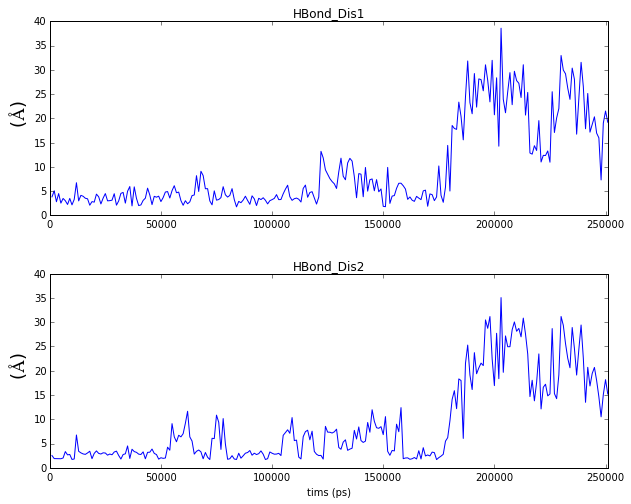

In [9]:
%matplotlib inline 
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot((211))

plt.title("HBond_Dis1")
plt.axis([0,251000,0,40])
plt.ylabel(r'  ($\AA$)',fontsize=18)
ax1.plot(time,dis1)

ax2 = fig.add_subplot((212))
fig.subplots_adjust(hspace=0.3)
plt.title("HBond_Dis2")
plt.ylabel(r'  ($\AA$)',fontsize=18)
plt.xlabel("tims (ps)")
plt.axis([0,251000,0,40])
ax2.plot(time,dis2)

plt.show()

##Understand the Solvents Effect

<img src="villin3.png">
###Calculate the nearest imidazolium (ion) to PHE residue

In [10]:
def BMI_PHE_dis(u):
    p_centerOfGeo = []
    for i in [6,10,17]:
        PHE= u.selectAtoms("resid %d" % (i))
        ring = PHE.selectAtoms("name CD1 or name CG or name CD2 or name CE2 or name CZ or name CE1")
        B = ring.centerOfGeometry()
        p_centerOfGeo.append(B)


    sel = u.selectAtoms("(byres resname BMI) and around 4.0 (protein)").residues
    x = sel.resids()
 
    b_centerOfGeo = []
    for i in np.arange(36,169):
        ring = u.selectAtoms("(resid %d) and (name C5 or name C6 or name C7 or name C8)" %(i))
        A = ring.centerOfGeometry()
        b_centerOfGeo.append(A)

    a = np.array(b_centerOfGeo)
    b = np.array(p_centerOfGeo)  
    
    box = u.trajectory.ts.dimensions[:3]
    from MDAnalysis.analysis.distances import distance_array, self_distance_array
    
    dis1, dis2, dis3 = distance_array(b, a, box)
    return [min(dis1), min(dis2), min(dis3)]

In [11]:
data = np.array([(u.trajectory.time, BMI_PHE_dis(u)[0], BMI_PHE_dis(u)[1], BMI_PHE_dis(u)[2]) for ts in u.trajectory])

In [12]:
time, dis1, dis2, dis3, = data.T

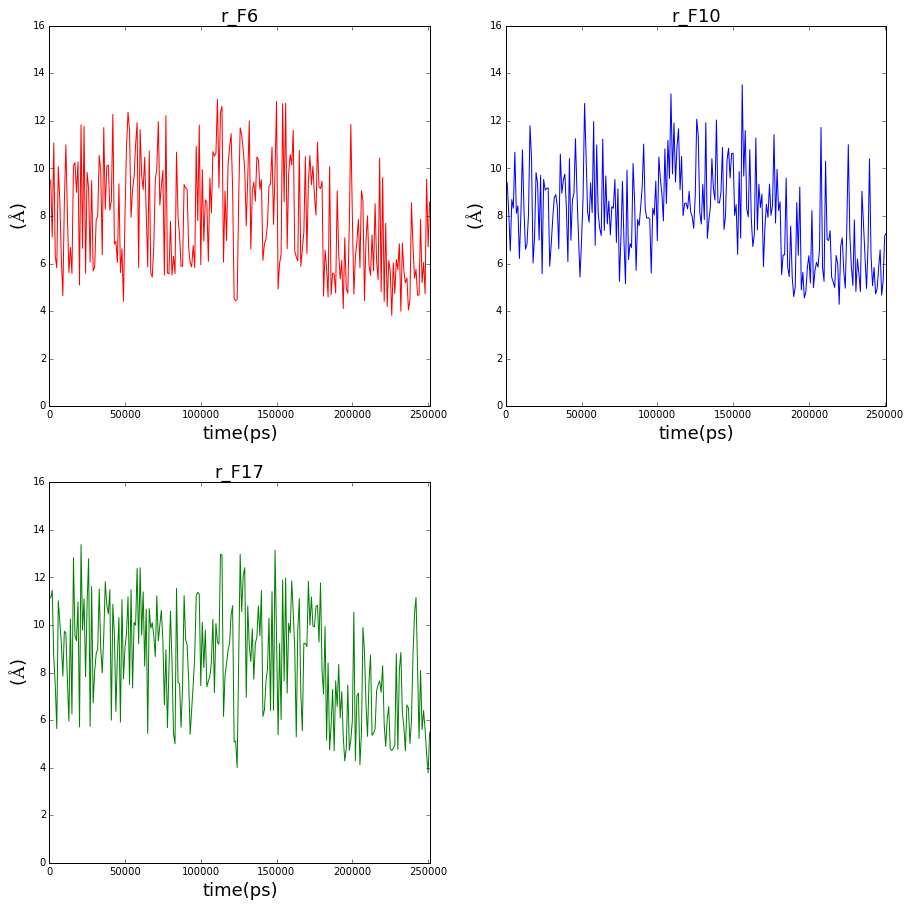

In [19]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(221)
ax1.plot(time, dis1, 'r')
plt.axis([0, 251000, 0, 16])
plt.title('r_F6',fontsize=18)
plt.ylabel('($\AA$)',fontsize=18)
plt.xlabel('time(ps)',fontsize=18)

ax2 = fig.add_subplot(222)
ax2.plot(time, dis2, 'b')
plt.axis([0, 251000, 0, 16])
plt.title('r_F10',fontsize=18)
plt.ylabel('($\AA$)',fontsize=18)
plt.xlabel('time(ps)',fontsize=18)

ax3 = fig.add_subplot(223)
ax3.plot(time, dis3, 'g')
plt.axis([0, 251000, 0, 16])
plt.title('r_F17',fontsize=18)
plt.ylabel('($\AA$)',fontsize=18)
plt.xlabel('time(ps)',fontsize=18)


plt.show()